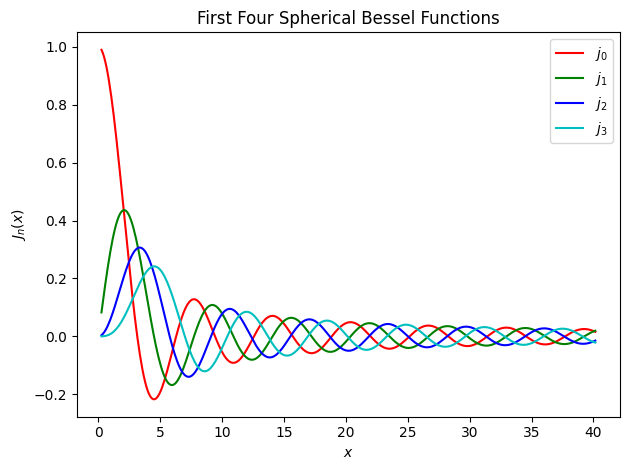

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def down(x, n: int, m: int):
    j = np.zeros((len(x), m+2), float)
    j[:, m+1] = j[:, m] = 1.0
    for k in range(m, 0, -1):
        j[:, k-1] = ((2*k + 1)/x)*j[:, k] - j[:, k+1]

    return j[:, n]/j[:, 0] * np.sin(x)/x  # Scale solution to known j[0]


Xmax = 40.25
Xmin = 0.25
step = 0.1  # Global class variables
start = 50  # Start of iteration

j0 = np.zeros((400), float)
j1 = np.zeros((400), float)
j2 = np.zeros((400), float)
j3 = np.zeros((400), float)

xx = np.arange(Xmin, Xmax, step)
j0 = down(xx, 0, start)
j1 = down(xx, 1, start)
j2 = down(xx, 2, start)
j3 = down(xx, 3, start)


# plot
fig = plt.figure()
plt.title("First Four Spherical Bessel Functions")
plt.xlabel('$x$')
plt.ylabel('$J_n(x)$')

plt.plot(xx, j0, 'r', label='$j_0$')
plt.plot(xx, j1, 'g', label='$j_1$')
plt.plot(xx, j2, 'b', label='$j_2$')
plt.plot(xx, j3, 'c', label='$j_3$')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
